In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import GalaxyGalaxy, SampleGG, SampleBELLS, SampleSL2S
from mejiro.exposure import Exposure
from mejiro.utils import util

# read configuration file
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
data_dir = config['data_dir']
save_dir = os.path.join(data_dir, 'cached_psfs')
psf_npy_files = sorted(glob(os.path.join(save_dir, '*.npy')))

num_samples = 25

psfs, psf_names = [], []
for f in np.random.choice(psf_npy_files, size=num_samples, replace=False):
    psf_name = os.path.basename(f).split('.')[0]
    psf = np.load(f)
    psf_names.append(psf_name)
    psfs.append(psf)

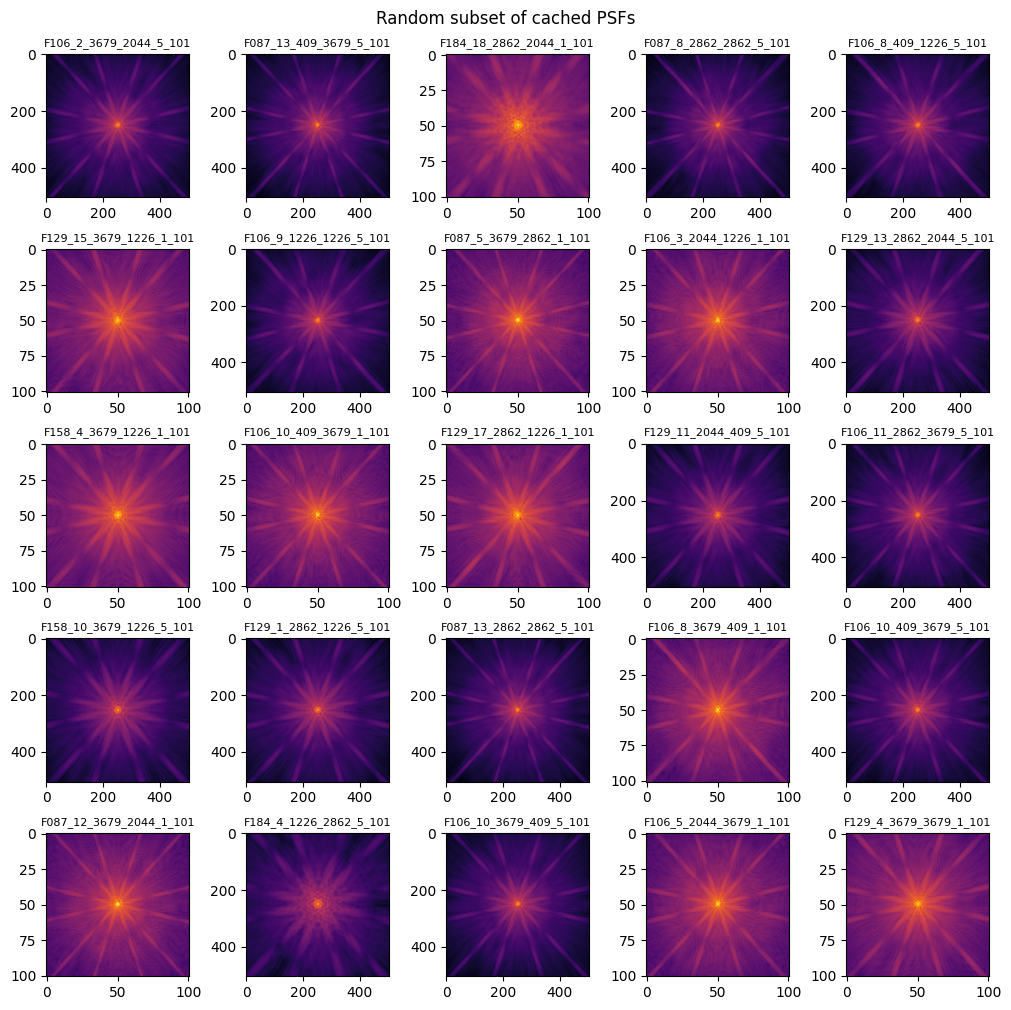

In [3]:
vmin = np.log10(np.min([np.min(psf) for psf in psfs]))
vmax = np.log10(np.max([np.max(psf) for psf in psfs]))

_, ax = plt.subplots(5, 5, figsize=(10, 10), constrained_layout=True)

for i, a in enumerate(ax.flatten()):
    a.imshow(np.log10(psfs[i]), cmap='inferno', vmin=vmin, vmax=vmax)
    a.set_title(psf_names[i], fontsize=8)

plt.suptitle('Random subset of cached PSFs')
plt.show()